In [20]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
nodes_df = pd.read_csv('../data/nodes.csv')
edges_df = pd.read_csv('../data/edges.csv')
G = nx.Graph()
source = edges_df['Source']
target = edges_df['Target']
nodes = nodes_df['Id']
description = nodes_df['Description']
G.add_edges_from(zip(source, target))
G.add_nodes_from(nodes)

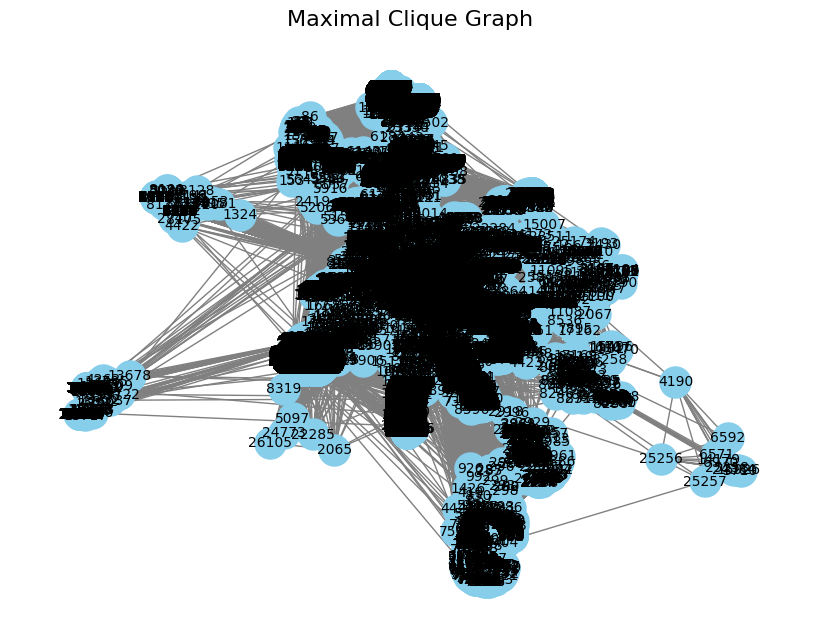

In [ ]:
clique_graph = nx.make_max_clique_graph(G)
pos = nx.spring_layout(clique_graph)  

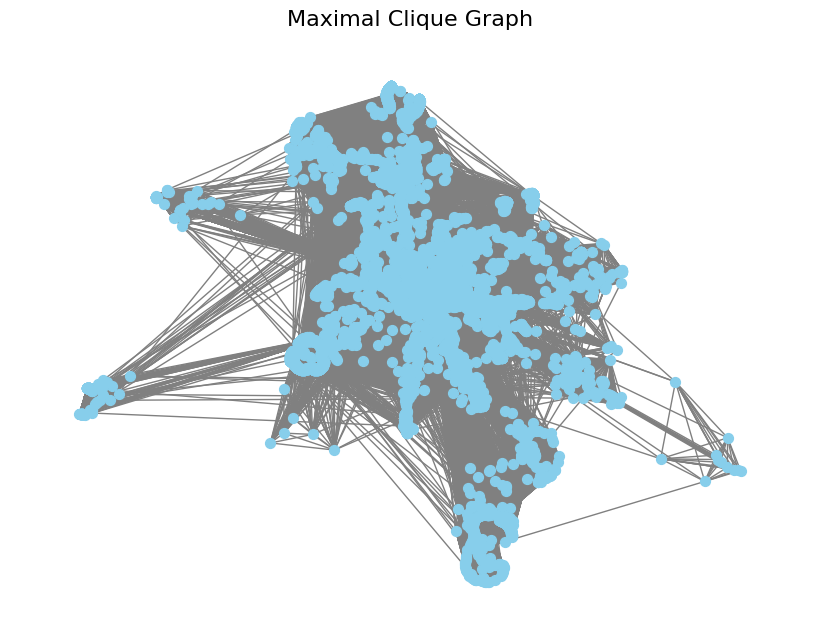

In [ ]:
# Step 4: Visualize the maximal clique graph
plt.figure(figsize=(7, 4))
nx.draw(clique_graph, pos, with_labels=False, node_color='skyblue', node_size=50, font_size=10, edge_color='gray')
plt.title("Maximal Clique Graph", fontsize=16)
plt.show()
plt.savefig('../figures/maximal_clique_graph.png')

In [4]:
cliques = list(nx.find_cliques(G))
print(len(cliques))
maximum_clique = max(cliques, key=len)
df_clique = pd.DataFrame(maximum_clique, columns=['Id'])
df_clique = pd.merge(df_clique, nodes_df, on='Id')
df_clique

26607


,Id,Label,Description,indegree,outdegree,Degree,modularity_class,clustering,stat_inf_class,Eccentricity,...,componentnumber,strongcompnum,weighted indegree,weighted outdegree,Weighted Degree,pageranks,eigencentrality,betweennesscentrality2,bridgingcoefficient,bridgingcentrality
0,did:plc:wlrhf55t4s3ok5ixkdmxtt3n,aserebrenik.bsky.social,Professor of Social Software Engineering. Eind...,22,11,33,11,0.147186,2,6,...,0,12336,22,11,33,0.000468,0.043123,5.750438e+06,0.370027,2.127818e+06
1,did:plc:34na47mry5rtwq3l7xm6w3hc,coolsweng.bsky.social,Professor of software engineering at AUEB and ...,553,54,607,12,0.005274,0,5,...,0,12336,553,54,607,0.013230,0.227626,3.263826e+07,0.000007,2.126275e+02
2,did:plc:ibvtwyk2mbnb6bw5a6asrdkv,leonmoonen.com,Data-Driven Software Explorer | Prof @ Simula ...,199,124,323,12,0.011830,0,6,...,0,12336,199,124,323,0.003542,0.089769,1.250486e+06,0.000028,3.491591e+01
3,did:plc:zrba3pzttl3nl34i3xmkhqsj,msabet.bsky.social,"Associate Professor, University of Ottawa",197,63,260,12,0.021430,0,6,...,0,12336,197,63,260,0.003637,0.088917,1.014525e+06,0.000062,6.264192e+01
4,did:plc:znr34ojdfu4xwhzeo5npnqug,paulasartori.bsky.social,Brazilian Dev trabalhando na Finlandia. 👩🏼‍💻☕️...,940,592,1532,5,0.000825,6,6,...,0,12336,940,592,1532,0.025482,0.305135,1.709353e+07,0.000001,1.437744e+01
5,did:plc:maarafolcmqlzhw6cmtfqfka,sozua.dev,dev | sistemas • algoritmos • cloud • web,17,123,140,5,0.015556,6,6,...,0,12336,17,123,140,0.000329,0.006188,4.100247e+05,0.000208,8.539213e+01


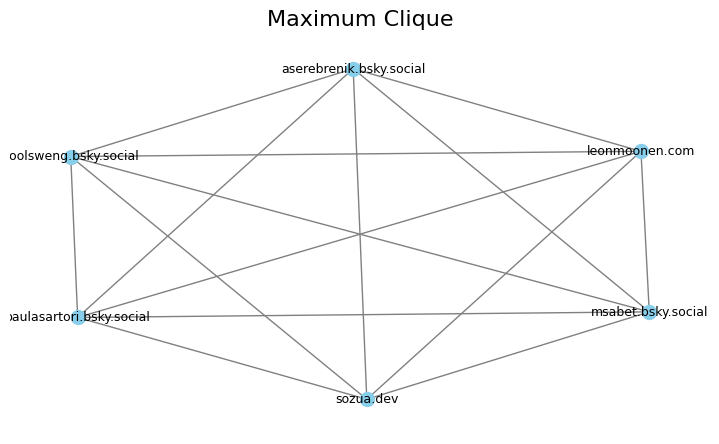

<Figure size 640x480 with 0 Axes>

In [8]:
labels = dict(zip(df_clique['Id'], df_clique['Label']))
pos = nx.spring_layout(G.subgraph(maximum_clique), seed=42)
plt.figure(figsize=(7, 4))
nx.draw(G.subgraph(maximum_clique), with_labels=True,labels=labels,pos=pos, node_color='skyblue', node_size=100, font_size=9, edge_color='gray')
plt.title("Maximum Clique", fontsize=16)
plt.show()
plt.savefig('../figures/maximum_clique.png')

In [14]:
cliques_count = {}
for i in range(2,len(maximum_clique)+1):
    cliques_count[i] = len([clique for clique in cliques if len(clique) == i])

{2: 24483, 3: 1279, 4: 406, 5: 323, 6: 116}

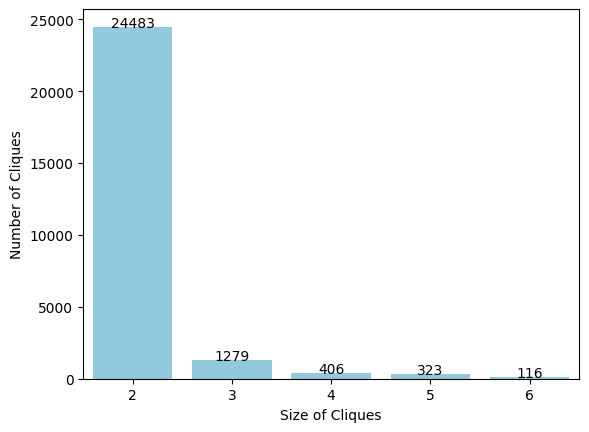

In [34]:
counts = pd.DataFrame(data=list(cliques_count.items()), columns=['Size of Cliques', 'Number of Cliques'])
sns.barplot(x='Size of Cliques', y='Number of Cliques', data=counts, color='skyblue')
#show the number of cliques in the plot
for index, row in counts.iterrows():
    plt.text(row.name, row['Number of Cliques'], row['Number of Cliques'], color='black', ha="center")
plt.savefig('../figures/cliques_count.png')